In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


file_path = "C:/Users/deepu/Downloads/archive/mobile_price_data.csv"
df = pd.read_csv(file_path)

print(df.info())

print(df.head())


print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [2]:
df['mobile_price'] = df['mobile_price'].replace('[\₹,]', '', regex=True).astype(float)


In [3]:
col = ['disp_size', 'resolution', 'mp_speed', 'int_memory', 'ram', 'p_cam', 'f_cam', 'battery_power', 'mob_width', 'mob_height', 'mob_depth', 'mob_weight']

for i in col:
    df[i] = pd.to_numeric(df[i], errors='coerce')


In [4]:
categorical_columns = ['num_cores']
df = pd.get_dummies(df, columns=categorical_columns)
print(df.isnull().sum())


mobile_name                0
mobile_price               0
mobile_color               0
dual_sim                   0
disp_size                459
resolution               459
os                         0
mp_speed                 459
int_memory               459
ram                      459
p_cam                    459
f_cam                    459
network                    0
bluetooth                  0
battery_power            459
mob_width                459
mob_height               459
mob_depth                459
mob_weight               459
num_cores_Octa Core        0
num_cores_Quad Core        0
num_cores_Single Core      0
dtype: int64


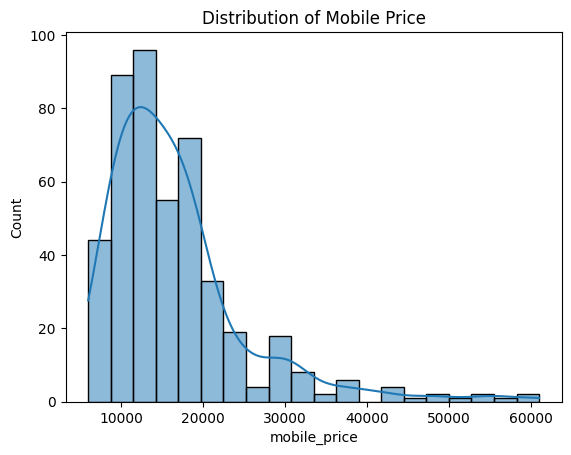

In [5]:
sns.histplot(df['mobile_price'], bins=20, kde=True)
plt.title('Distribution of Mobile Price')
plt.show()


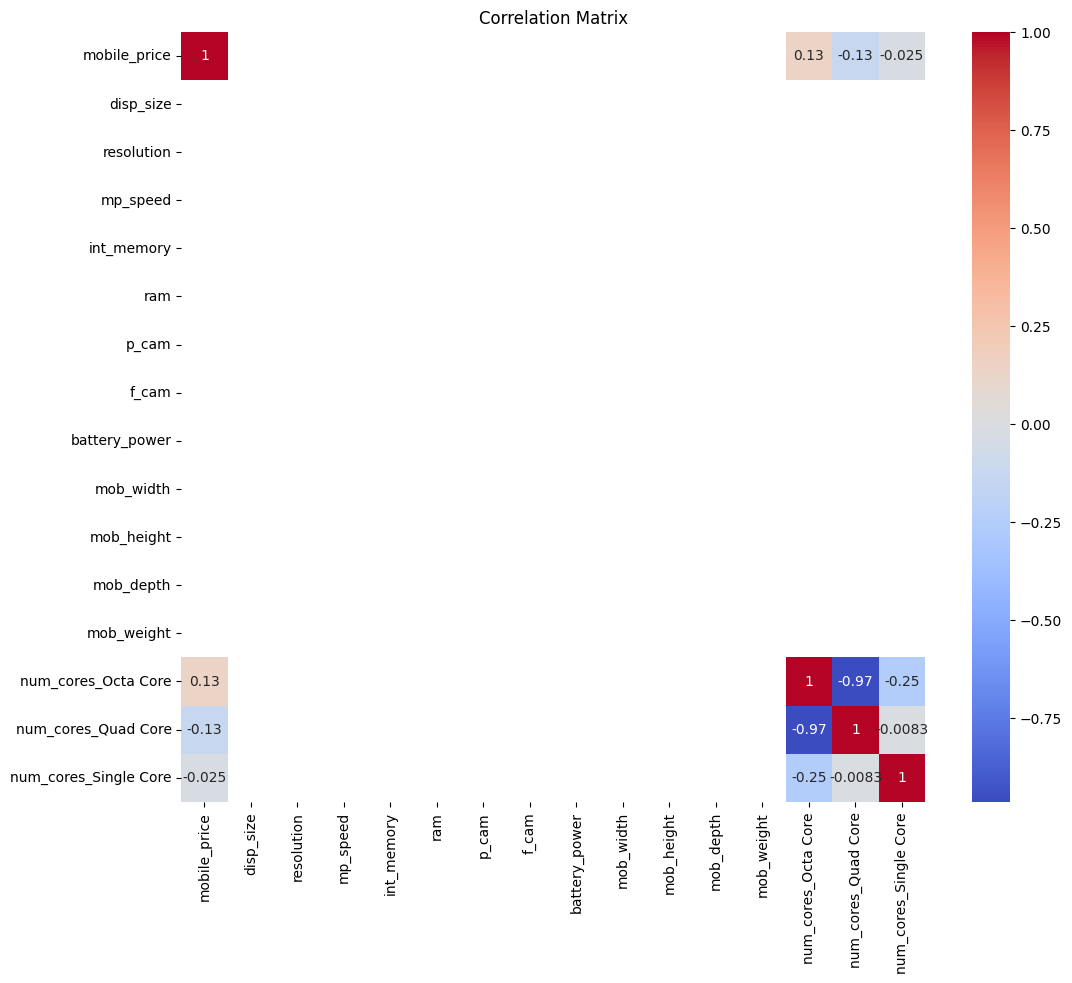

In [6]:
numeric_df = df.drop(['mobile_name', 'mobile_color', 'dual_sim', 'os', 'network', 'bluetooth'], axis=1)

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
X = numeric_df.drop('mobile_price', axis=1)
y = numeric_df['mobile_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


c:\Users\deepu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\deepu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\deepu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [13]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [14]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 72863201.80102186
R2 Score: -0.0004522086445741813
